## <font color = 'Red'> Import required Libraries.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [10]:
# Read the data into DataFrame.
import pandas as pd
data=pd.read_csv(r"S:\Clone Repository\Data-Science\Multi Linear Regression_5\Dataset\ToyotaCorolla.csv",encoding='latin1')
print(data.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

## <font color = 'Red'> Exploratory Data Analysis :

In [11]:
# Consider the required features from the datafarme.
data1=data.iloc[:,[2,3,6,8,12,13,15,16,17]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
# Basic information about null values and data type.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
# Statsistical Information
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [13]:
#check the missing values
data1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

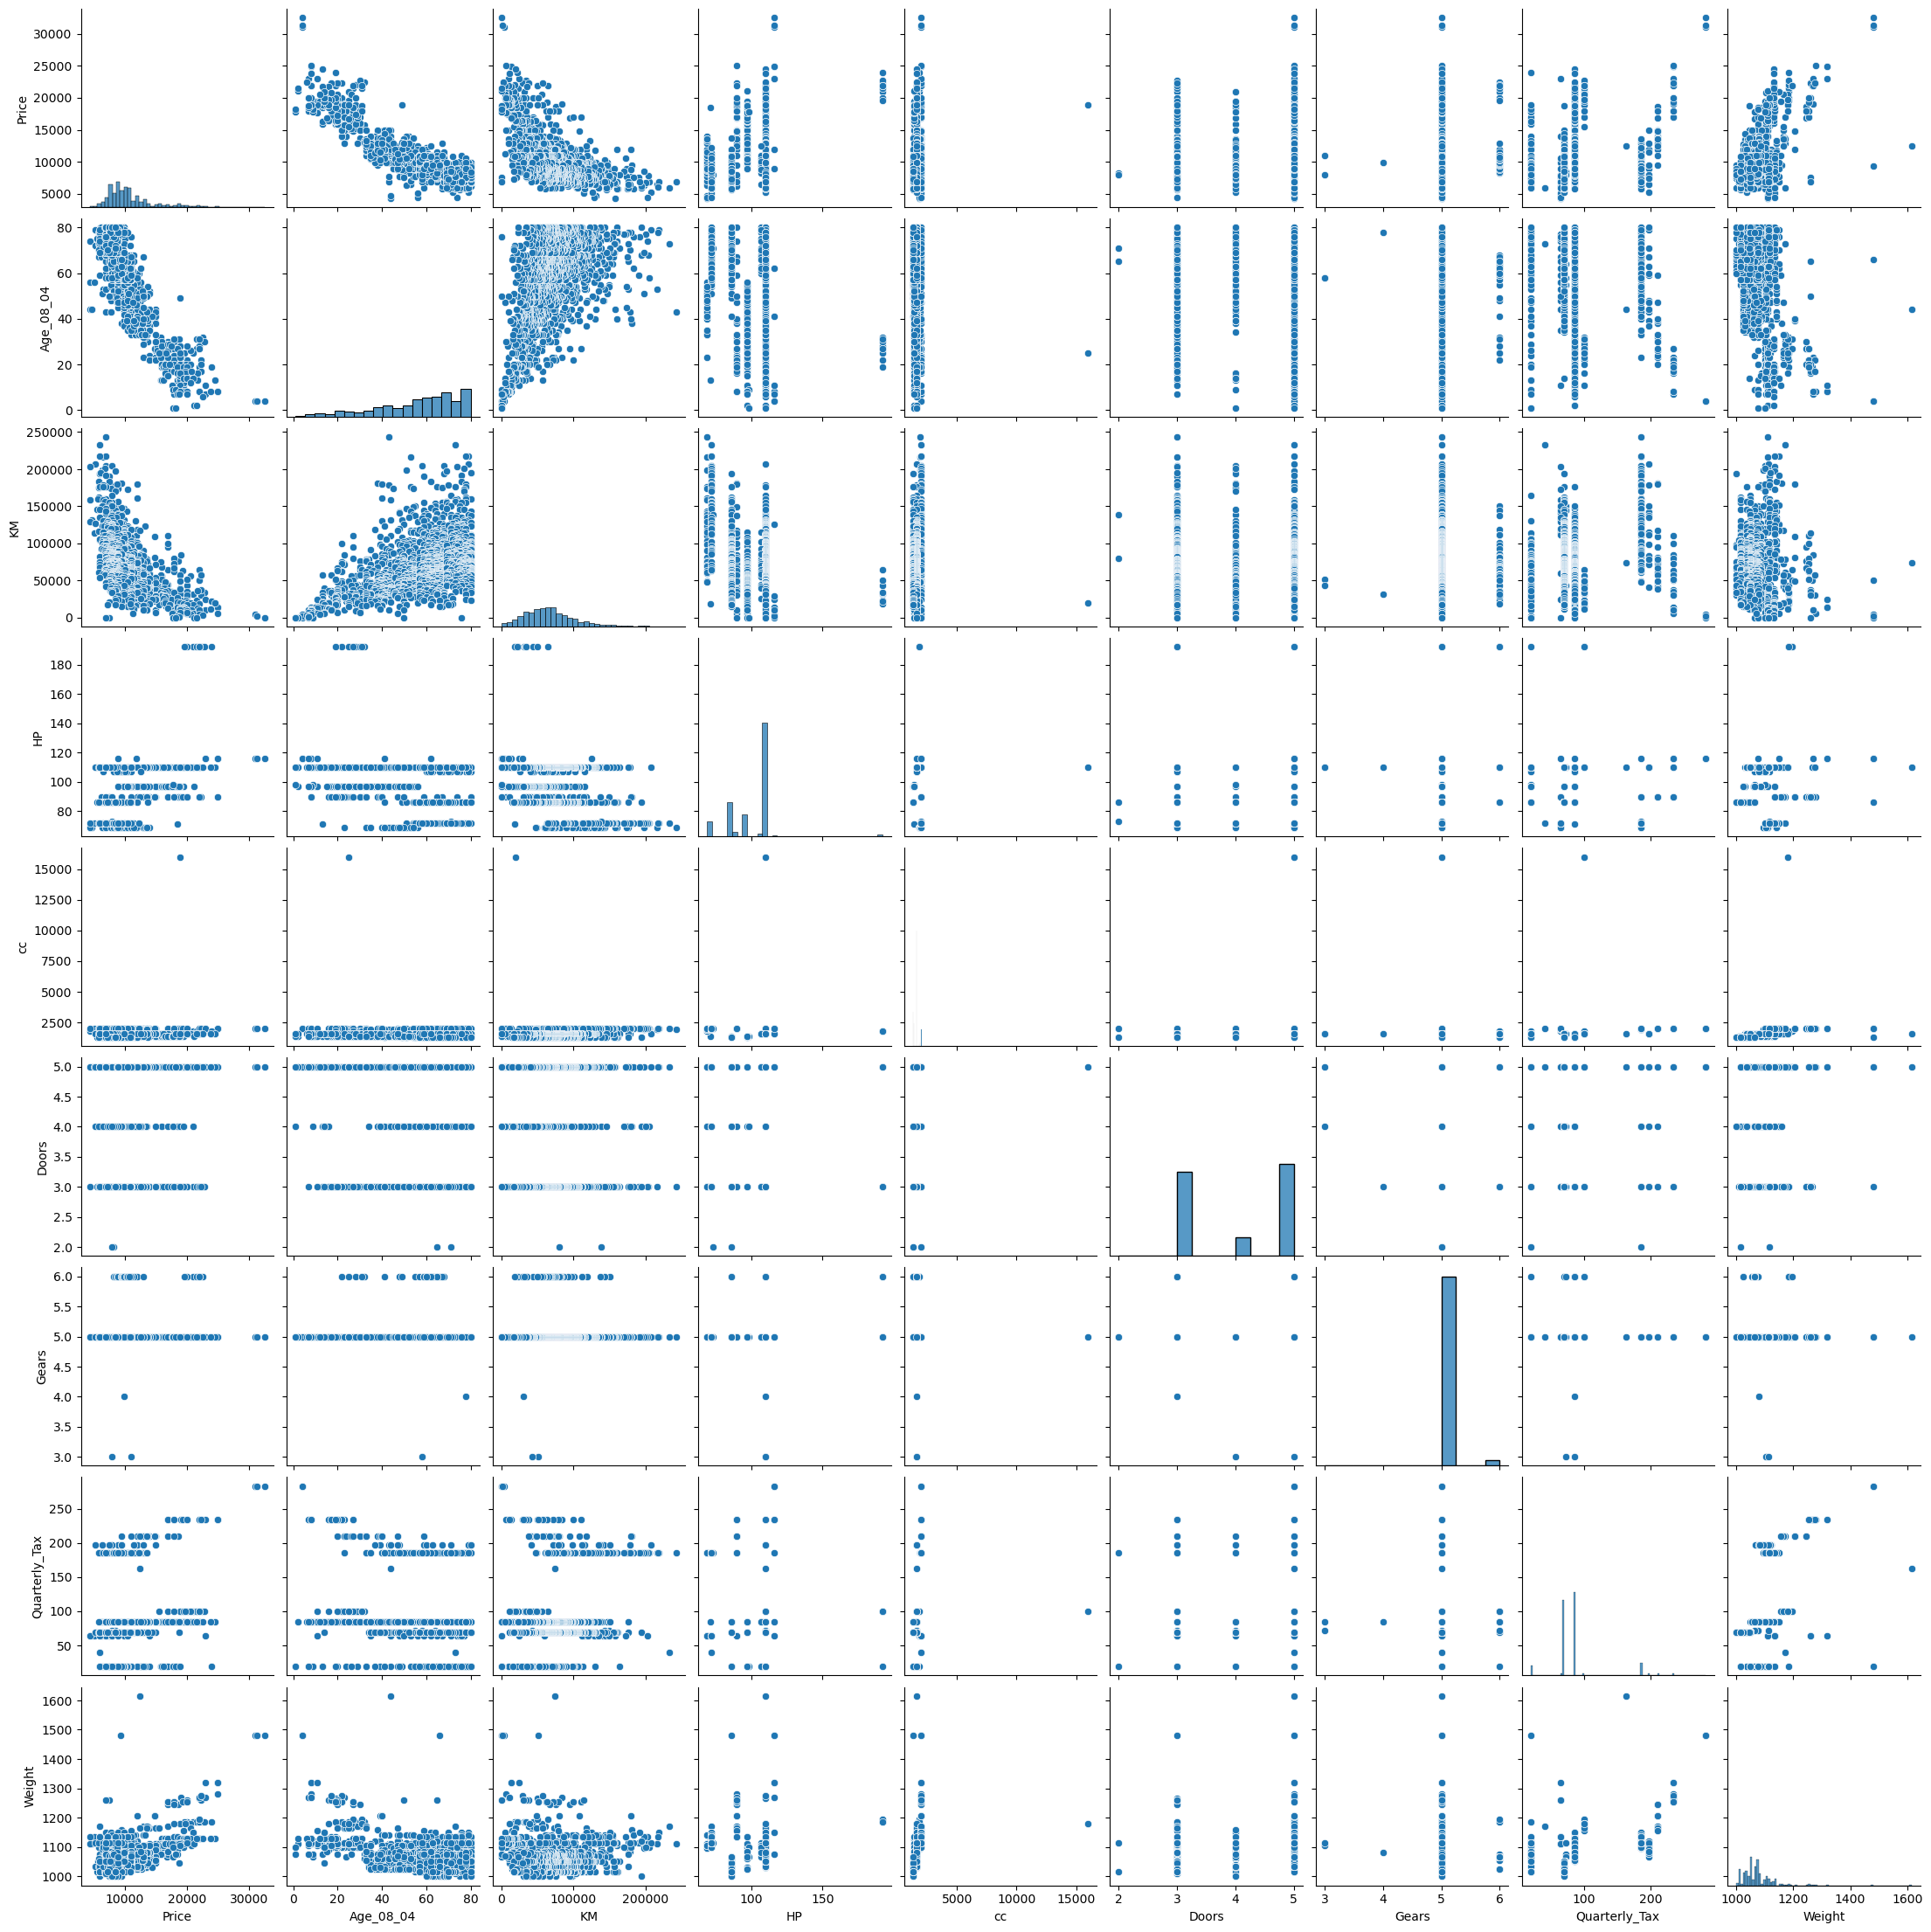

In [16]:
sb.pairplot(data1)

## <font color = 'Yellow'> Model Building

In [18]:
# Build the model with all features considered.
model_1=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+ Doors+Quarterly_Tax+Weight',data=data1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:31:24   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <font color = "Yellow"> Model validation

In [19]:
# paqrams give the coefficents of all features
model_1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Gears             594.319936
Doors              -1.616641
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [35]:
# T and p values 
print(f"T_values are :\n{model_1.tvalues}","\n\n\n"f"P_values are :\n{model_1.pvalues}")

T_values are :
Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Gears             3.016007
Doors            -0.040410
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 


P_values are :
Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Gears             2.606549e-03
Doors             9.677716e-01
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [36]:
# R and Adjusted_Rsquared values
print(f"Rsquared value :\n{model_1.rsquared}","\n\n\n",f"Adjusted r_sq values :\n{model_1.rsquared_adj}")

Rsquared value :
0.8637627463428191 


 Adjusted r_sq values :
0.8629989775766962


## <font color = "Yellow"> Correlation b/w dependent and independent variables

In [50]:
data1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [51]:
p_cc = smf.ols('Price ~ cc',data=data1).fit().rsquared
p_doors = smf.ols('Price ~ Doors',data=data1).fit().rsquared
p_gears = smf.ols('Price ~ Gears',data=data1).fit().rsquared
print(p_cc, p_doors, p_gears)

0.015974229213322366 0.034345559431097517 0.003982096785359546


## <font color = "Yellow"> Multi Colinearity Analysis

### Calculating VIF :-

In [55]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Gears+Doors+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Gears+Doors+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_HP=1/(1-HP)

rsq_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_cc=1/(1-cc)

rsq_doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data1).fit().rsquared
vif_doors=1/(1-doors)

rsq_Gears=smf.ols('Gears~Age_08_04+Quarterly_Tax+cc+KM+HP+Doors+Weight',data=data1).fit().rsquared
vif_Gears=1/(1-Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age_08_04+Gears+cc+KM+HP+Doors+Weight',data=data1).fit().rsquared
vif_Quarterly_Tax=1/(1-Quarterly_Tax)

rsq_Weight=smf.ols('Weight~Age_08_04+Quarterly_Tax+cc+Gears+KM+HP+Doors',data=data1).fit().rsquared
vif_Weight=1/(1-Weight)


In [61]:
# Storing the Rsquared values and VIF values in a dataframe.
table = pd.DataFrame({
    "Variables" : ['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
    "R_squared_val" : [rsq_age,rsq_KM,rsq_HP,rsq_cc,rsq_doors,rsq_Gears,rsq_Quarterly_Tax,rsq_Weight],
    "VIF values" : [vif_age,vif_KM,vif_HP,vif_cc,vif_doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]})
table

,Variables,R_squared_val,VIF values
0,Age_08_04,0.469389,1.884620
1,KM,0.430817,1.756905
2,HP,0.295488,1.419422
3,cc,0.140815,1.163894
4,Doors,0.135378,1.156575
5,Gears,0.089853,1.098723
6,Quarterly_Tax,0.567368,2.311431
7,Weight,0.602610,2.516420


In [ ]:
# Since low VIF values between independent variables, there is no multi colinearity.
# Less than 20 is the desirable VIF value. 

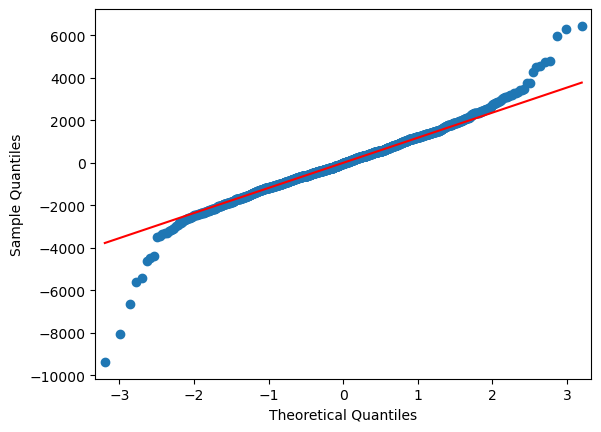

In [81]:
fig = sm.qqplot(model_1.resid, line = "q")


In [75]:
list(np.where(model_1.resid>6000))

[array([147, 523], dtype=int64)]

In [56]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [57]:
def standardized(values):
         return (values-values.mean())/values.std()

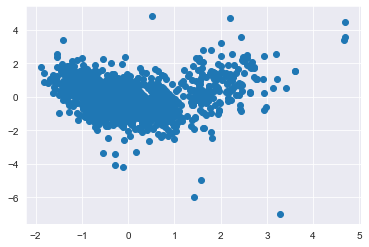

In [58]:
plt.scatter(standardized(model.fittedvalues),standardized(model.resid))

In [59]:
#residual Vs regressor

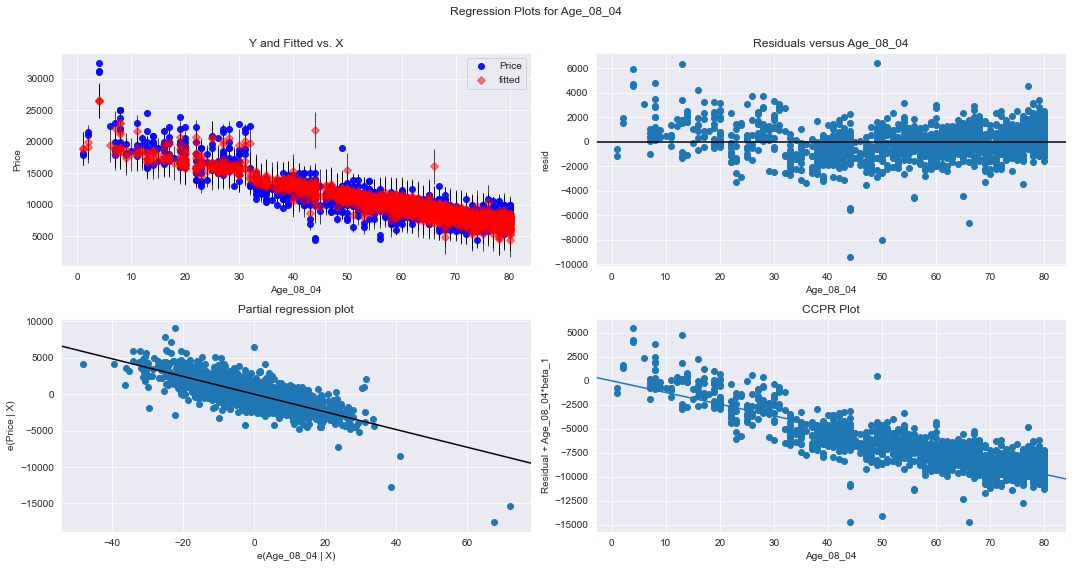

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

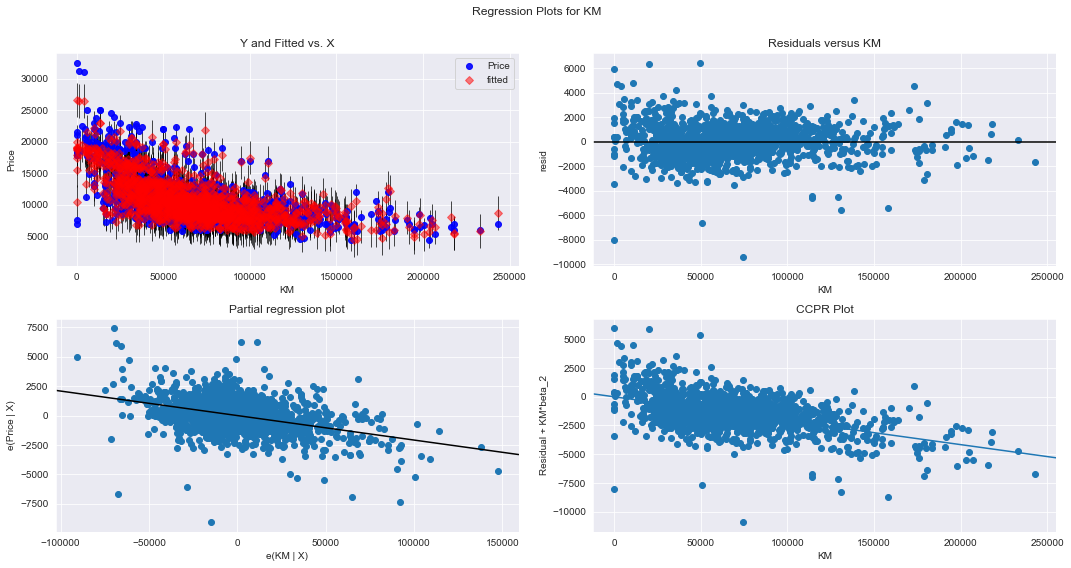

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

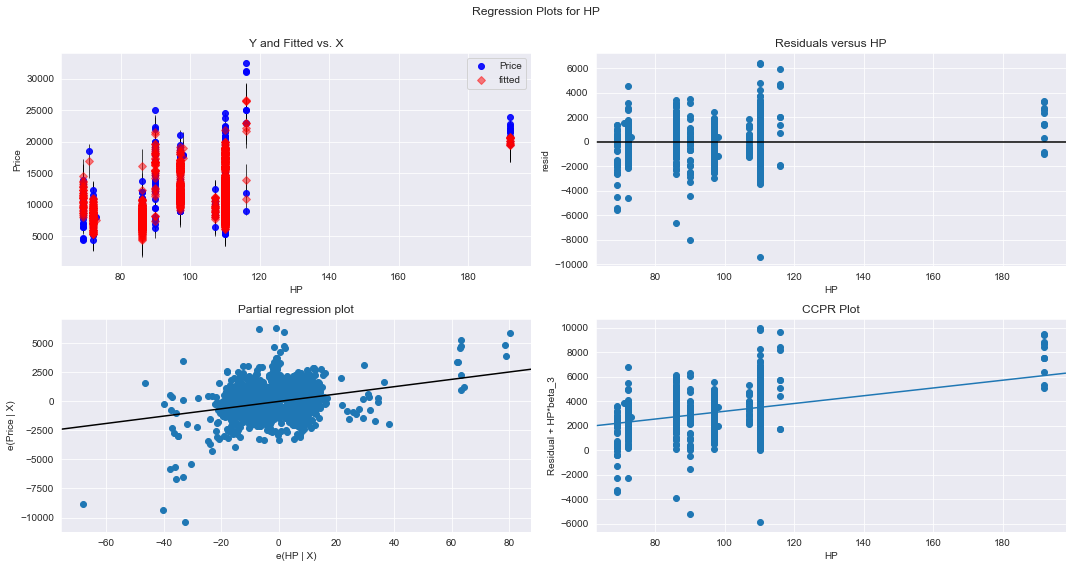

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

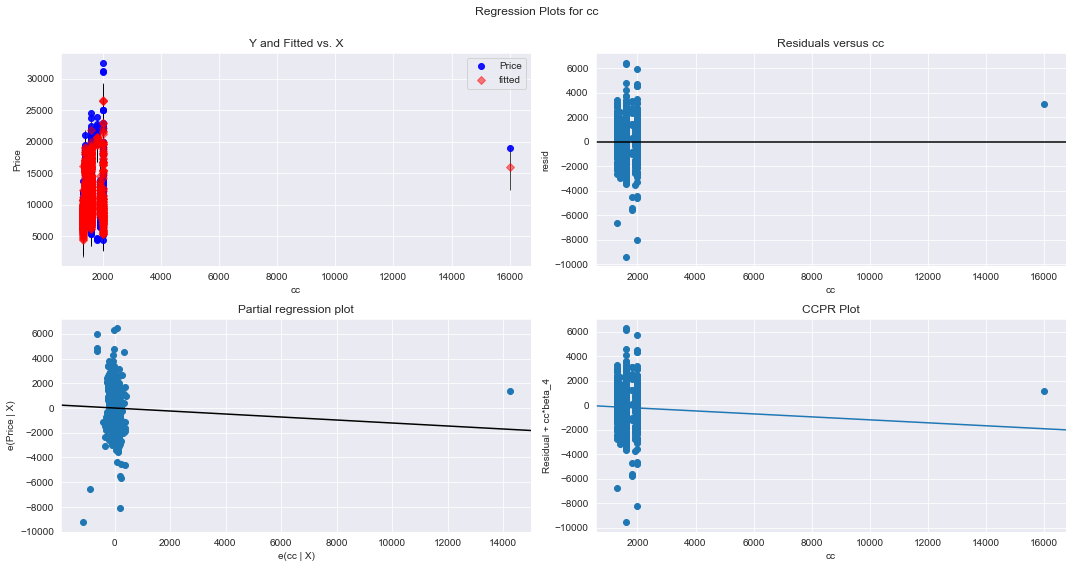

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

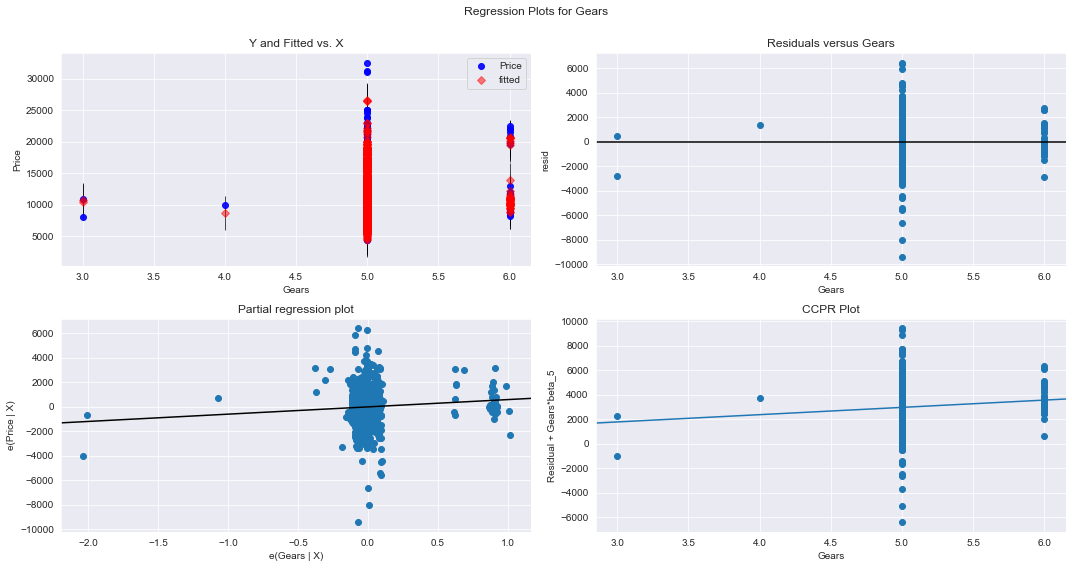

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

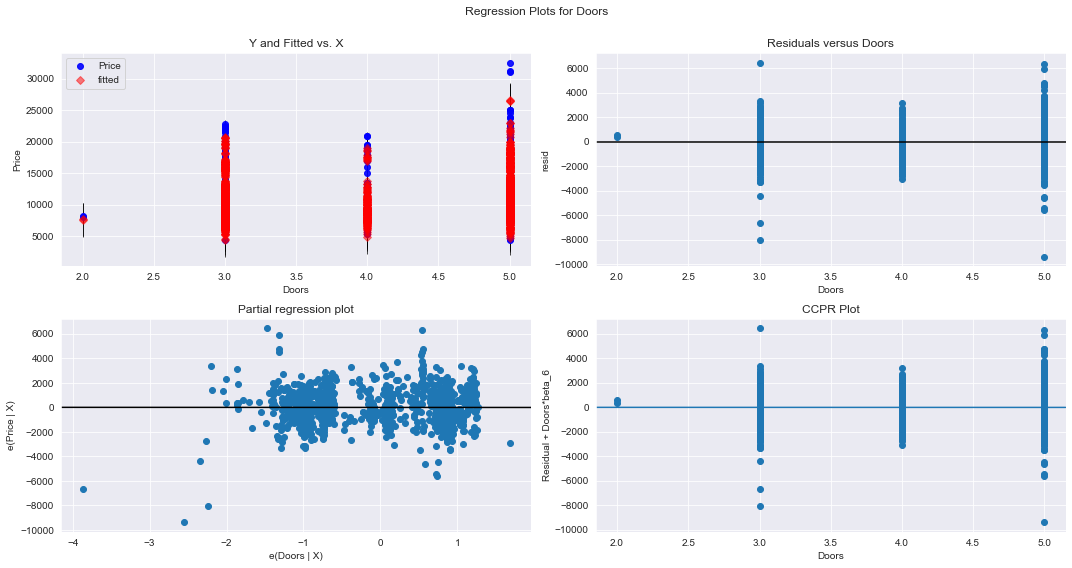

In [65]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

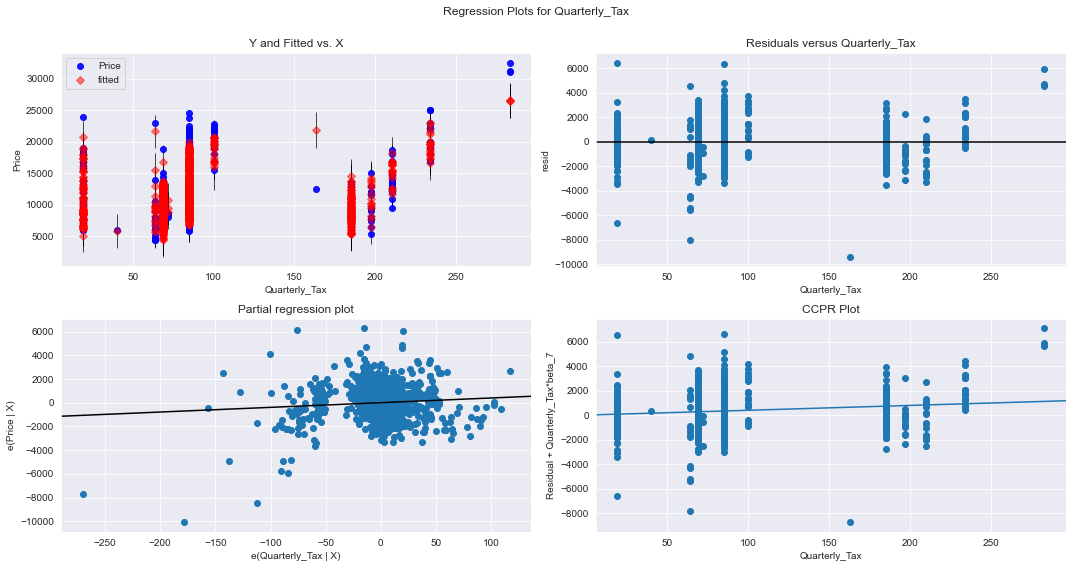

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

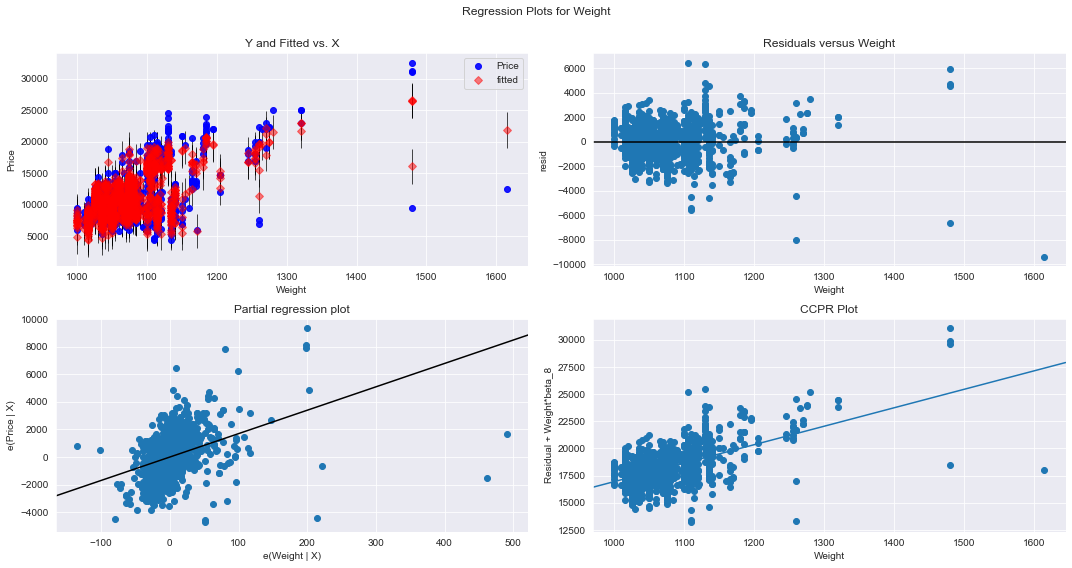

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# cooks distance

In [68]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

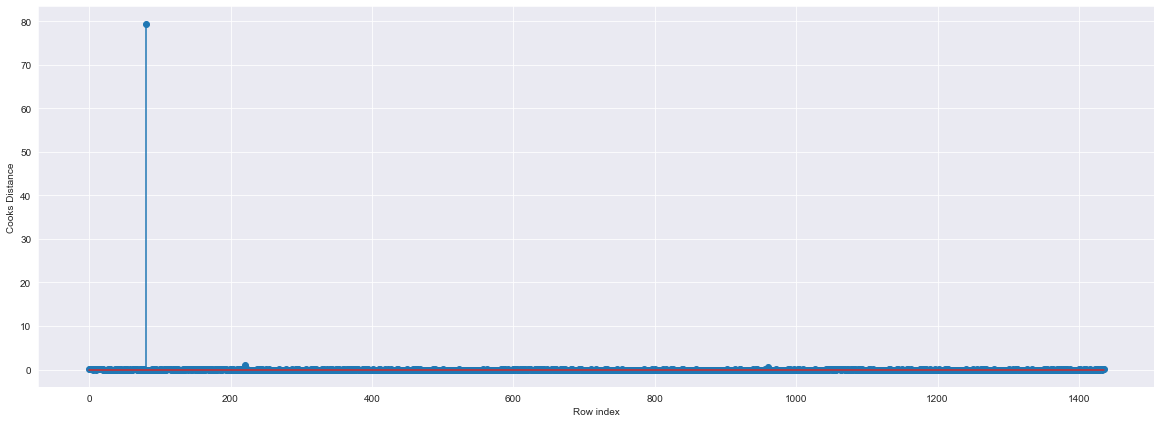

In [70]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
(np.argmax(c),np.max(c))

(80, 79.52010624137802)

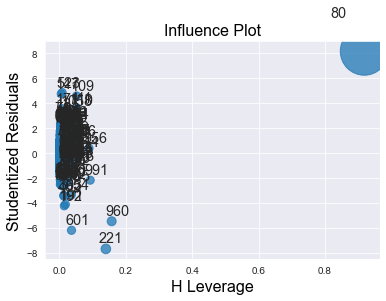

In [72]:
#high influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [73]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [74]:
data1[data1.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [75]:
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# improving the model

In [79]:
data2=pd.read_csv("D:\\EXCLER solution\\data set\\Multi Linear Regression\\ToyotaCorolla.csv",encoding='latin1')

In [80]:
data2

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [82]:
#deleting influencer rows
data3=data2.drop(data2.index[[80]],axis=0).reset_index()

In [83]:
data3

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,...,1,1,1,0,1,1,1,0,0,0
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,...,0,0,1,0,0,1,1,0,0,0
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,...,0,0,1,0,0,0,1,0,0,0
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,...,0,0,0,0,0,0,1,0,0,0


In [84]:
data3=data3.drop(['index'],axis=1)

In [85]:
data3

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [98]:
final_mlr =smf.ols('Price~Age_08_04+KM+HP+cc+Gears+ Doors+Quarterly_Tax+Weight',data=data3).fit()

In [99]:
(final_mlr.rsquared,final_mlr.aic)

(0.8693790488655817, 24687.28102432684)

# Model Predication

In [100]:
new_data1=pd.DataFrame({"Age_08_04":30,"KM":20000,"HP":92,"cc":300,"Doors":4,"Gears":4,"Quarterly_Tax":200,"Weight":1000},index=[0])
new_data1

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,30,20000,92,300,4,4,200,1000


In [101]:
final_mlr.predict(new_data1)

0    16568.348775
dtype: float64

In [102]:
pred_y=final_mlr.predict(data1)
pred_y

0       16528.990607
1       16065.803813
2       16502.686471
3       16149.527067
4       15938.095051
            ...     
1431     8971.183912
1432     8435.722285
1433     8591.588786
1434     8713.828687
1435     9969.788925
Length: 1436, dtype: float64